<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros e o objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**


*   Existe relação entre tipo de linha e gravidade do acidente?
*   Acidentes com cargas perigosas tendem a ter mais vítimas?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Existe sazonalidade (mês ou hora) na ocorrência dos acidentes?
*   Existe uma estação do ano com maior número de acidentes?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo des acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

In [ ]:
## Carga de bibliotecas utilizadas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
import seaborn as sns




In [ ]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
df.head()

,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Quilômetro_Final,Estação_Anterior,...,Prefixo,Double_Stack,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,Prejuízo_Financeiro
0,Sim,FTL,12/01/2020,16:00,PE,Jaboatao dos Guararapes,Tronco Sul Recife,5.000,5.001,Jorge Lins,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,Não,"918,00"
1,Não,FCA,12/03/2020,11:04,MG,Santo Antonio do Monte,Garças de Minas - Calafate,675.450,NaN,St. Amaro do Monte,...,C305,Não,Cargas,0,0,Cloreto de Potássio,Rogerio Dias da Silva,NaN,Sim,NaN
2,Não,MRS,12/04/2020,06:35,MG,Ibirite,Variante do Paraopeba,614.996,NaN,Ibirite,...,KPE1101,Não,Cargas,0,0,Container Carregado de 20,MARCELINO BASILIO,NaN,Sim,NaN
3,Sim,FTL,12/04/2020,20:30,MA,Sao Luis,Ramal de Itaqui,30.000,NaN,Pátio Esso,...,W002,Não,Cargas,0,0,Óleos Diesel em VagõesTanque VagõesVazios de ...,MARCIO ADRIANO SANTOS NUNES,NaN,Não,NaN
4,Sim,FTL,12/05/2020,16:35,CE,Crateus,Tronco Norte Fortaleza,475.000,NaN,Crateus,...,K107,Não,Cargas,0,0,Bobinas de Aço ou Ferro Cimento Acondicionado...,ANTONIO EGENNALES ALVES DE MIRANDA JONAEL DE ...,NaN,Sim,NaN


In [ ]:
## Primeira Inspeção
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

# Informações dos tipos de dados
df.info()

# Verificar valores nulos
df.isnull().sum()

# Estatísticas descritivas iniciais
df.describe(include='all')

Total de linhas: 2973
Total de colunas: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   object 
 14  Natureza             2973 non-null   object 


,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Quilômetro_Final,Estação_Anterior,...,Prefixo,Double_Stack,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,Prejuízo_Financeiro
count,2973,2973,2973,2973,2973,2973,2973,2973.000000,2927.000000,2973,...,2847,2853,2853,2973.000000,2973.000000,2737,2846,117,2973,1158
unique,2,13,1259,1185,22,499,116,NaN,NaN,815,...,1744,3,8,NaN,NaN,551,1930,5,2,492
top,Não,RMS,19/03/2022,11:20,PR,Curitiba,Paranaguá - Uvaranas,NaN,NaN,D Pedro II,...,M17,Não,Cargas,NaN,NaN,VagõesVazios de Estrada de Ferro Circulando So...,ABADIO ALVES DA SILVA,MRS,Não,"120,00"
freq,1596,858,8,12,643,156,280,NaN,NaN,59,...,24,2849,2705,NaN,NaN,479,36,54,1622,182
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.398091,276.695156,NaN,...,NaN,NaN,NaN,0.337370,0.154053,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.120316,251.894582,NaN,...,NaN,NaN,NaN,0.936873,0.374778,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.089000,97.654500,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.326000,219.801000,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.000000,374.350500,NaN,...,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Analise Descritiva

# Frequência da gravidade
print(df['Gravidade'].value_counts())

# Acidentes por UF
print(df['UF'].value_counts())

# Número médio de feridos e mortos
print(df[['N_feridos', 'N_obitos']].astype(int).mean())

# Média e desvio padrão do prejuízo
print(df['Prejuízo_Financeiro'].describe())

Gravidade
Não    1596
Sim    1377
Name: count, dtype: int64
UF
PR    643
MG    607
SP    590
RJ    225
SC    170
BA    108
CE    108
MA    101
RS     91
PI     56
MS     53
PB     45
ES     31
AL     26
GO     26
MT     21
PE     18
RN     17
TO     15
PA     14
DF      7
SE      1
Name: count, dtype: int64
N_feridos    0.337370
N_obitos     0.154053
dtype: float64
count    2.973000e+03
mean     8.824369e+04
std      1.377213e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.800000e+02
max      6.000000e+07
Name: Prejuízo_Financeiro, dtype: float64


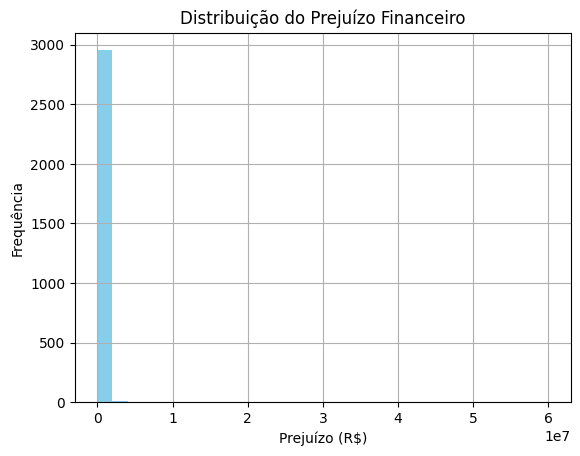

In [ ]:
##Visualizações Gráficas

##Histogramas
df['Prejuízo_Financeiro'].hist(bins=30, color='skyblue')
plt.title('Distribuição do Prejuízo Financeiro')
plt.xlabel('Prejuízo (R$)')
plt.ylabel('Frequência')
plt.show()


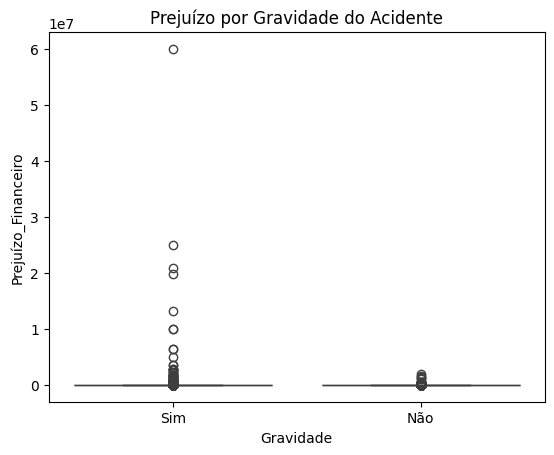

In [ ]:
##Boxplots

sns.boxplot(x='Gravidade', y='Prejuízo_Financeiro', data=df)
plt.title('Prejuízo por Gravidade do Acidente')
plt.show()

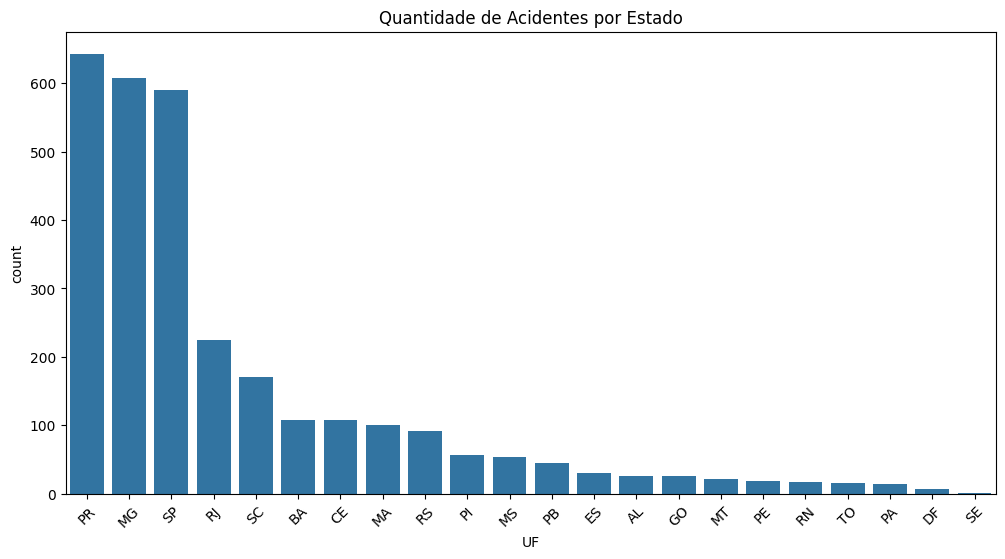

In [ ]:
## Acidentes por Estado (UF)
plt.figure(figsize=(12,6))
sns.countplot(x='UF', data=df, order=df['UF'].value_counts().index)
plt.title('Quantidade de Acidentes por Estado')
plt.xticks(rotation=45)
plt.show()

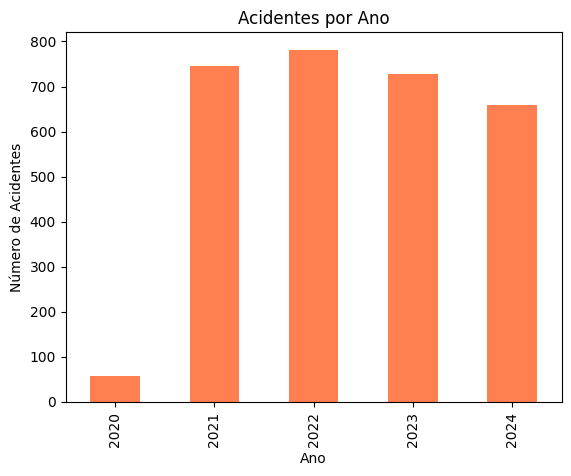

In [ ]:
##Evolução Temporal
df['Ano'] = df['Data_Ocorrencia'].dt.year
df.groupby('Ano').size().plot(kind='bar', color='coral')
plt.title('Acidentes por Ano')
plt.ylabel('Número de Acidentes')
plt.xlabel('Ano')
plt.show()

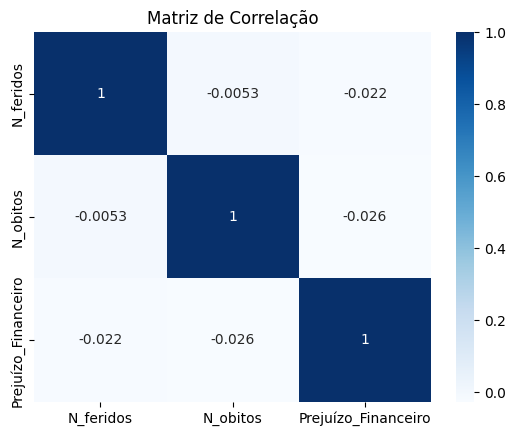

In [ ]:
## Matriz de Correlação (variáveis numéricas)
numericas = ['N_feridos', 'N_obitos', 'Prejuízo_Financeiro']
sns.heatmap(df[numericas].corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
##Normalização e Padronização
# Normalização (Min-Max) da coluna de Prejuízo
df['Prejuizo_Normalizado'] = (df['Prejuízo_Financeiro'] - df['Prejuízo_Financeiro'].min()) / (df['Prejuízo_Financeiro'].max() - df['Prejuízo_Financeiro'].min())

# Padronização (Z-score)
df['Prejuizo_Padronizado'] = zscore(df['Prejuízo_Financeiro'])
df[['Prejuízo_Financeiro', 'Prejuizo_Normalizado', 'Prejuizo_Padronizado']].head()


NameError: name 'zscore' is not defined